#Assignment 1 :- Building a NN with custom dataset (Keras)
---

##**Introduction**
While working on diverse array of projects, one of the most useful skill would be handling data of various formats and arrangements. Usually, in Keras the datasets like `MNIST` and `CIFAR-10` can be loaded using functions like:



```
 tf.keras.datasets.mnist.load_data(path="mnist.npz")
```

However, many intricate processes take place under the hood which needs to be understood and utilized in the case of handling custom datasets.


## **Objective**

Your objective in this assignment is to use all the knowledge and experience you have had in using Keras to :-


1.   Load `MNIST` dataset using custom functions
2.   Apply suitable transformations and data cleaning techniques.
3.   Flatten the images or extract a feature vector(optional).
4.   Build a multi-layered fully connected network (FCN) and use it to perform a classification task on test dataset. 

## **Provided Materials**

*  `custom_MNIST` folder ([drive folder here](https://drive.google.com/drive/folders/1pLU_nCa1hjc_-p2GcEkK67TrlgJYmFjT?usp=sharing))
  *  `data_desc.csv` :- Contains test and train split of data along with its labels.
  * 50000 train and 12000 test data points stored in .npy format.

---


###_Step 1_ : Import Libraries

Import the necessary libraries you may require for the project, it was always easier to check what all can be useful by going through the documentation.

*Note*: If colab notebook is being used, make sure you `Change Runtime Type` under `Runtime` to GPU and then start running all your code. 


In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import label_binarize
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn


###uncomment to mount drive####

# from google.colab import drive
# drive.mount('/content/gdrive/')


###_Step 2.a._ : Import data using custom functions

We now import our data through the pipelines Keras provides. It would require suitable customizations depending on the problem at hand.

Necessary transforms may also be created here.

*Note*: Make sure you are in the correct directory before starting this step


In [2]:
def load_data():
    data_desc = pd.read_csv("data_desc.csv")
    loc_train = data_desc.loc[data_desc["split"] == "train"]["file_name"]
    loc_test = data_desc.loc[data_desc["split"] == "val"]["file_name"]
    
    X = []
    y = []
    folder = "data/"
    
    for i, img_name in enumerate(os.listdir(folder)):
        
        fileName = folder+img_name
        img = np.load(fileName)
            
        X.append(img)
        y.append(int(data_desc.loc[data_desc['file_name'] == img_name]['label']))
        
    return X, y

In [3]:
X, y = load_data()

In [3]:
data_desc = pd.read_csv("data_desc.csv")

In [ ]:
np.save("X_imageData", X)
np.save("y_imageData", y)

In [4]:
X = np.load("X_imageData.npy")
y = np.load("y_imageData.npy")

X_train = X[data_desc['split'] == 'train'].reshape(-1, 28, 28, 1)
y_train = y[data_desc['split'] == 'train'].reshape(-1, 1)
X_test  = X[data_desc["split"] ==   'val'].reshape(-1, 28, 28, 1)
y_test  = y[data_desc["split"] ==   'val'].reshape(-1, 1)

###_Step 2.b._: Data visualization

It is good practice to see and visualize your data to make sure it is in the right format and condition before it is trained and tested upon. Although it is not mandatory, data visualization might play a vital role in giving insights and ideas on how one can move ahead with a particular dataset.

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 28, 28, 1)
(50000, 1)
(12000, 28, 28, 1)
(12000, 1)


C:\Users\Arjun Prasad\anaconda3\envs\DeepLearning_Tensorflow\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


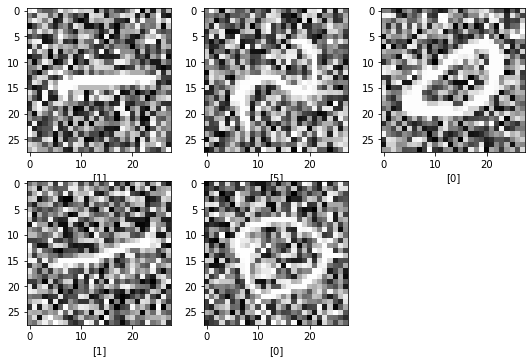

In [6]:
# printing images
plt.figure(figsize=(9,9))
for i in range(5):
  plt.subplot(331 + i)
  plt.imshow(X_train[i,:,:,0], cmap = plt.get_cmap('gray'))
  plt.xlabel(y_train[i])
plt.show()

In [7]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

X_train = X_train/255
X_test = X_test/255

###_Step 3_ : Define Model architecture

After we make sure the data is in the format that we need, we can start builing a suitable model architecture. You may go with a simple FCN with multiple layers along with non-linear activations and possible dropout layers as you see fit.

If you feel adventurous you may try and build a better network perhaps using CNNs etc. Feel free to experiment.

In [8]:
def createModel():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), input_shape = (28, 28, 1), padding = 'valid', activation = 'relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), input_shape = (28, 28, 1), padding = 'valid', activation = 'relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
    
    model.add(tf.keras.layers.Conv2D(filters =64, kernel_size = (3,3), input_shape = (12, 12, 32), padding = 'same', activation = 'relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(filters =64, kernel_size = (3,3), input_shape = (12, 12, 32), padding = 'same', activation = 'relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(32, activation='relu', activity_regularizer = tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Dense(10, activation = 'softmax',  activity_regularizer = tf.keras.regularizers.l2(0.01)))
    
    model.summary()

    return model

###Step 4: Training and Validation Loop

Before starting the training it is important to decide upon the performance metrics used to show how well your model works.

Based on the Training strategy and performance metrics decided by you, different types of loops can be made.

Feel free to use the [documentation](https://keras.io/getting_started/intro_to_keras_for_engineers/) of Keras as you see fit.

In [9]:
def trainModel(model):
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    keras_history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)
    return keras_history

In [10]:
def getModelPredictions(model, X_test):
    predictions = np.argmax(model.predict(X_test), axis = 1)
    return predictions


In [11]:
tf.keras.backend.clear_session()
model = createModel()
keras_history = trainModel(model)
y_pred = getModelPredictions(model, X_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        2

###Step 5: Results

Here it would be preferable to build confusion matrix and AUC curves while calculating other classification metrics such as `Accuracy`, `F1 Score`, `Sensitivity` and `Specificity` on the valdation dataset.

Feel free to present data to the best of your capabilites!

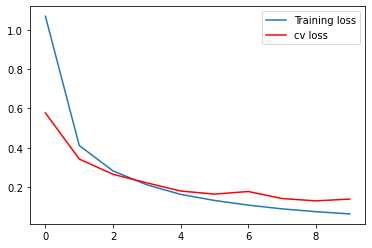

In [12]:
plt.plot(keras_history.history['loss'], label='Training loss')
plt.plot(keras_history.history['val_loss'], color='red', label='cv loss')
plt.legend()

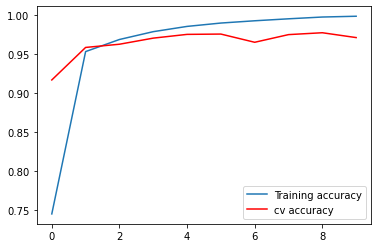

In [13]:
plt.plot(keras_history.history['accuracy'], label='Training accuracy')
plt.plot(keras_history.history['val_accuracy'], color='red', label='cv accuracy')
plt.legend()

In [15]:
print("Classification report for classifier %s:\n%s\n"
      % (model, classification_report(np.argmax(y_test, axis = 1), y_pred)))

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000192C4E08198>:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1141
           1       0.99      1.00      0.99      1325
           2       0.99      0.96      0.98      1220
           3       0.99      0.97      0.98      1239
           4       0.97      0.98      0.97      1155
           5       0.99      0.92      0.95      1093
           6       0.98      0.98      0.98      1216
           7       0.97      0.98      0.98      1216
           8       0.91      0.99      0.95      1238
           9       0.97      0.95      0.96      1157

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000




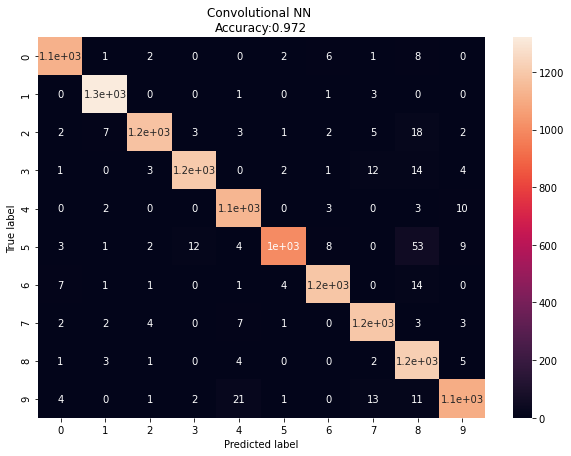

In [21]:
confusion_mc = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (10,7))
seaborn.heatmap(df_cm, annot=True)
plt.title('Convolutional NN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test.argmax(axis = 1), y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label');